# Descartes Underwriting - Technical test


The goal of this technical excercise is to build a model able to predict whether a given policy holder is more or less likely to have a car accident. A training dataset containing the class of each policy holder (i.e. if he/she was actually involved in a car accident) is given, along many feature describing the driving behaviour and the lifestyle of each driver. On the basis of this dataset, one has to train a machine learning algorithm and perform the classification task on the (unlabelled) test set. In other words, we need to solve a binary classification problem.

Being able to correctly assess the probability of accident is fundamental for an insurance company: if the number of accidents is underestimated, the company may underprice the policies, resulting in a financial loss. 

This assignment is structured in the following way:

1. In the first section, an exploratory analysis of the dataset is performed. The meaning of each feature is briefly explained and the most significant features (i.e. the features which most likely have an impact on the probability of accident) are selected.

2. In the second section, datas are cleaned and prepared in order to be used in a machine learning model.

3. In the third section, I propose two models of classifiers.

4. In section four, I present my conclusions.



## Exploratory analysis of dataset:


We start importing some libraries which will be useful in the following:



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here we import the train and the test datasets using the `read_csv()` function from the Pandas library:

In [2]:
# Import train and test datasets

train=pd.read_csv('train_set.csv')
test=pd.read_csv('test_set.csv')

The dataset are now stored in a pandas DataFrame structure. We can visualise the first 5 entries of the train dataset using the `head()` method:

In [3]:
train.head()

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban


The number of rows of the train dataset can be found using the `shape` attribute:

In [4]:
train.shape[0]

8161

As we can see the train dataset contain 8161 rows. We can get some more information using the `info()` method:

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8161 entries, 0 to 8160
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   INDEX        8161 non-null   int64  
 1   TARGET_FLAG  8161 non-null   int64  
 2   TARGET_AMT   8161 non-null   float64
 3   KIDSDRIV     8161 non-null   int64  
 4   AGE          8155 non-null   float64
 5   HOMEKIDS     8161 non-null   int64  
 6   YOJ          7707 non-null   float64
 7   INCOME       7716 non-null   object 
 8   PARENT1      8161 non-null   object 
 9   HOME_VAL     7697 non-null   object 
 10  MSTATUS      8161 non-null   object 
 11  SEX          8161 non-null   object 
 12  EDUCATION    8161 non-null   object 
 13  JOB          7635 non-null   object 
 14  TRAVTIME     8161 non-null   int64  
 15  CAR_USE      8161 non-null   object 
 16  BLUEBOOK     8161 non-null   object 
 17  TIF          8161 non-null   int64  
 18  CAR_TYPE     8161 non-null   object 
 19  RED_CA

The train dataset contains 26 features. 12 of these features are numerical attributes, while the remaining 14 have dtype object (we will see in the following that they are simple string of text). Moreover, we see that the train dataset contains 8161 rows, but some of the columns contain missing values: these are the AGE,YOJ,INCOME,HOME_VAL,JOB, and CAR_AGE. 

Using the `keys()` methods we can get a list of all the features of the dataset:

In [6]:
train.keys()

Index(['INDEX', 'TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS',
       'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION',
       'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In the following the meaning of these features is explained more in detail.


### Dictionary of features:


- TARGET_FLAG: Whether the policy holder have already been involved in a car accident.
- TARGET_AMT: If the policy holder has been involved in a crash, what was the cost. Not relevant for our problem. 
- KIDSDRIV: It means if the policy holder has kids which also drive the car. Younger people are, in general, more reckless than older ones. **The fact that kids use the car too is likely to increase probability of accidents**.
- AGE : Age of the policy holder. As before: **younger people are more likely to adopt dangerous behaviours**. On the other hand, **old people** (let's say, people older than 60 years old) **are likely to have worst reflexes and longer reactions times**, which increases the odds of car accident.  
- HOMEKIDS: The number of kids which live with the policy holder (they are not necessarily licensed to drive).
- YOJ: Years on job 
- INCOME: Income of the policy holder
- PARENT1: Categorical variable. Does it mean being single parent? Probably yes
- HOME_VAL: Value of the main residence
- MSTATUS: Marital status. 'Yes' for married, 'z_No' for single.
- SEX: Biological sex of the policy holder. 
- EDUCATION: Education of the policy holder 
- JOB: Job of the policy holder
- TRAVTIME: Travel Time (Likely the time of the home-jobplace trip). This feature is likely to have quite an important impact on the probability of car accident: the more time one spend to drive, the higher are the chances an accident occurs.
- CAR_USE: Categorical variable, can be 'Private' or 'Commercial'
- BLUEBOOK: value of the used car. 
- TIF: time in force. Number of years the policy holder has been insured with the company.
- CAR_TYPE: Type of vehicle
- RED_CAR: whether the color of the car is red or no. Apparently, there is a urban legend saying that red cars are more likely to have accidents.
- OLDCLAIM: amount of money payed-out after past accidents. That may 
- CLM_FREQ: number of past accidents
- MVR_PTS: motor vehicle record points. That is a score used in USA which measures how good is a driver. Each traffic violation contribute with points to the MVR. The more the violation is severe, the more points are attributed. E.g. driving while intoxicated, murder with vehicle, fleeing from a police officer, contribute with four points. Out-dated inspection stickers, no proof of insurance, license plate missing, count as 1 point, and so on. Therefore, we expect that an higher MVR corresponds to higher probability of accident. See e.g. https://www.utsystem.edu/sites/default/files/sites/policy-library/files/related-forms/uts157/mvrpoints.pdf for more details. However, it should be noticed that the MVR is calculated differently for each state, according local traffic laws. If datas of the dataset come from driver living in different states, we should try to uniform the score. 
- CAR_AGE: years of the car. This may have an impact on the probability of accident. As rule of thumb, newer cars implement more sophisticated security systems than older ones. However, at first glance, the importance of this feature, compared to other ones like travel time
- URBANICITY: whether the policy holder live in a city or in the countryside. This may have an impact on the probability of accident, since in a city the density of vehicle is higher than to the countryside. 

- REVOKED: whether the policy holder had its driving licence revoked or not in the past

Among all the features in the training dataset, the TARGET_FLAG is of special interest, because it represents the labels of our datas (we want to train a classifier to predict this variable on the basis of other features). Using the value_counts() method we can see how the instances of the dataset are distributed between the two classes:

In [7]:
train['TARGET_FLAG'].value_counts()

0    6008
1    2153
Name: TARGET_FLAG, dtype: int64

As we can see, **our dataset is highly unbalanced**: there are almost three times more exemples in the negative class (TARGET_FLAG=0) than in the positive one (TARGET_CLASS=1). For the moment we dont do any use of this information, but it will be important later, when we will have to train the classifier.

### Effect of features on the probability of accident

Here I perform some simple statistical analysis in order to select which features are the most relevant in order to predict the probability of a car accident.

#### KIDSDRIV

As we have mentioned, we expect that policy holders having kids driving the same car are more susceptible to have their car involved in a car accident. In order to see this, I use the groupby method to select policy holder having the same number of driving kids, and for each of this subgroups I calculate the ratio between policy holders involved in a car accident and the total size of the subgroups. Being K the number of driving kids, we are basically estimating the conditional probability

$$ P(TARGET\_FLAG=1|KIDSDRIV=K)$$

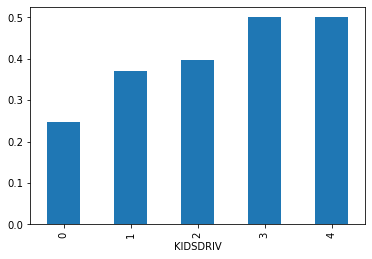

In [8]:
# group the policy holders according the number of kids
# which use their car:
g=train.groupby('KIDSDRIV')['TARGET_FLAG']

# For each subgroup, compute the number of policy holders
# having their car involved in an accident
NumAcc=g.sum()

# For each subgroup, compute size of the subgroup:
NumTot=g.count()

# Plot the probability of accident according the number of driving kids:
PrbAcc=NumAcc/NumTot
PrbAcc.plot(kind='bar')

Unsurprisingly, we see that the more kids are driving the car of their parents, the more the probability of accident increases. We can proceed analogously for the other features

#### AGE



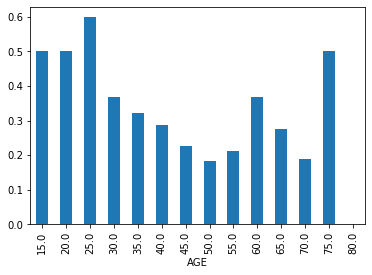

In [9]:
# Create a copy of dataset
train2=train.copy()

# Round the age to base 5 
train2['AGE']=(round(train['AGE']/5)*5)

# Group the policy holders by their age:
g=train2.groupby('AGE')['TARGET_FLAG']

# For each subgroup compute the number of policy holders
# involved in an accident
NumAcc=g.sum()

# For each subgroup, compute size of the subgroup
NumTot=g.count()

# Estimate probability of accident for each age
PrbAcc= NumAcc/NumTot

# Plot the resulting distribution
PrbAcc.plot(kind='bar')




This feature exhibits an interesting effect on the  probability of accident: we see that the probability of accident as a function of the age has two main peaks, one corresponding to very young and the other corresponding to very old drivers.


#### MVR_PTS

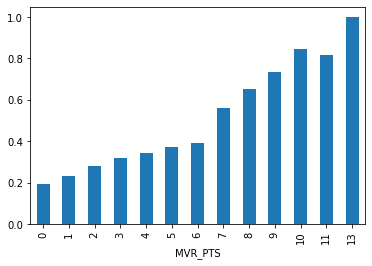

In [10]:

# Group the policy holders according their MVR 
g=train.groupby('MVR_PTS')['TARGET_FLAG']

# For each subgroups, compute number of policy holders involved in accidents
NumAcc=g.sum()

# For each subgroups, compute size of subgroup
NumTot=g.count()

# Estimate probability of accident given the MVR record
PrbAcc=NumAcc/NumTot

# Plot the probability
PrbAcc.plot(kind='bar')

As we explained before, the more the motorvehicle records points are high, the more a driver is expected to have a dangerous behaviour. As expected, we see that the probability of accident increases with the MVR_PTS feature.

#### CAR_TYPE

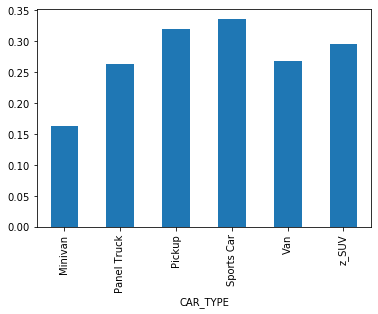

In [11]:
# Group the policy holders according the car type
g=train.groupby('CAR_TYPE')['TARGET_FLAG']

# For each subgroup compute number of accidents
NumAcc=g.sum()

# For each subgroup compute size of subgroup
NumTot=g.count()

# Estimate probability of accident
PrbAcc=NumAcc/NumTot


#Plot
PrbAcc.plot(kind='bar')


Here we reproduce the probability of accident as a function of the CAR_TYPE attribute. As we can see, the sports car seems to have an highest probability of accident (as expected, since they can run faster). However, there is no clear pattern in this distribution. It does not seem to be so relevant in order to predict the probability of accident. 

#### URBANICITY

(array([0, 1]), <a list of 2 Text xticklabel objects>)

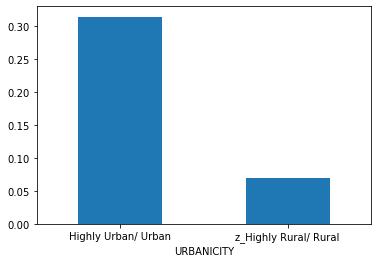

In [12]:

# Group policy holder according where they live (Rural/Urban)
g=train.groupby('URBANICITY')['TARGET_FLAG']

# For each subgroup compute number of accident
NumAcc=g.sum()

# For each subgroup compute size of group
NumTot=g.count()


# Estimate probability of accident
PrbAcc=NumAcc/NumTot

# Plot 
PrbAcc.plot(kind='bar')
plt.xticks(rotation=0)

As expected, policy holders living in a urban center are more likely to be involved in an accident than rural drivers. This is reasonable: in a big city there is much mure traffic, therefore probability of collision increases.

#### MSTATUS

(array([0, 1]), <a list of 2 Text xticklabel objects>)

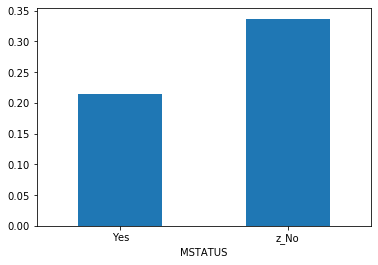

In [13]:

# Group policy holders according their marital status
g=train.groupby('MSTATUS')['TARGET_FLAG']

# For each subgroup compute number of accidents
NumAcc=g.sum()

# For each subgroup, compute size of the subgroup
NumTot=g.count()

# Estimate probability of accident
PrbAcc=NumAcc/NumTot

# Plot estimate of probability
PrbAcc.plot(kind='bar')
plt.xticks(rotation=0)

As we can see, married policy holders are more likely to be involved in a car accident. This is also reasonable: single policy holders are probably more susceptible to get out in the evening. Moreover, this may be correlated to the age of drivers: young drivers (which are the most dangerous) are also most likely single.

#### SEX 

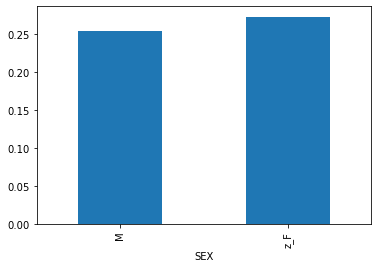

In [14]:

# group policy holders according their sex
g=train.groupby('SEX')['TARGET_FLAG']

# For each subgroup compute number of policy holders involved in a car accident
NumAcc=g.sum()

# For each subgroup, compute size of the subgroup
NumTot=g.count()

# Estimate probability of accident for each subgroup
PrbAcc=NumAcc/NumTot

# Plot the estimate
PrbAcc.plot(kind='bar')




As we can see here, the gender of the driver has not much impact on the probability of accident

#### HOMEKIDS

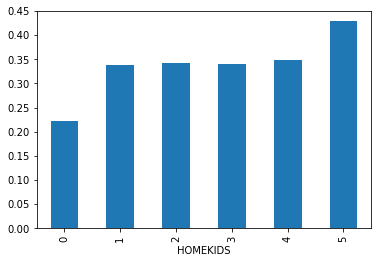

In [15]:
# group policy holders according the number of kids they have at home
g=train.groupby('HOMEKIDS')['TARGET_FLAG']

# Compute number of accident in each subgroup
NumAcc=g.sum()

# Compute size of each subgroup
NumTot=g.count()

# Estimate probability of accident for each subgroup
PrbAcc=NumAcc/NumTot

# Plot 
PrbAcc.plot(kind='bar')


As we can see, policy holders with kids are a bit more susceptible to have their car involved in a car accident. However, the difference is not that important. Probably the most relevant information is contained in the feature DRIVKIDS

#### JOB

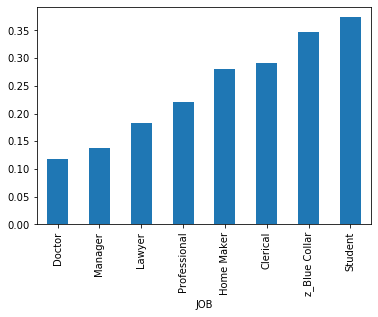

In [16]:
# Group the policy holders according their job
g=train.groupby('JOB')['TARGET_FLAG']

# Compute number of accident for each subgroup
NumAcc=g.sum()

# Compute size of each subgroup:
NumTot=g.count()

# Estimate probability of accident for each subgroup
PrbAcc=NumAcc/NumTot

# Plot 
PrbAcc.sort_values().plot(kind='bar')

Here we found an interesting pattern: it seems that policy holders with a white collar job are less likely to be involved in a car accident. Students are indeed the category with the highest risk (which is probably related with their age)

#### EDUCATION

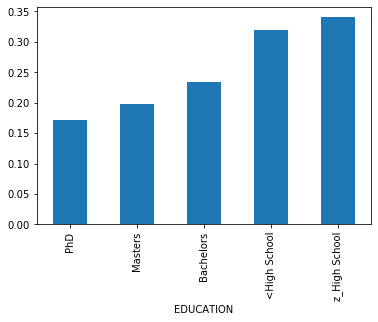

In [17]:
# group policy holders by their education
g=train.groupby('EDUCATION')['TARGET_FLAG']


# Compute number of accident for each subgroup
NumAcc=g.sum()

# Compute size of each subgroup:
NumTot=g.count()

# Estimate probability of accident for each subgroup
PrbAcc=NumAcc/NumTot

# Plot 
PrbAcc.sort_values().plot(kind='bar')






Here we found another interesting pattern: we see that the probability of accident decreases for highly educated policy holders. This may be also correlated with other two features that, as we have seen, have an impact on the accident probablity, namely the age and the job. In fact, the categories with the highest probability of accident are policy holders with an high school degree and policy holder which did not obtained (yet) their high school degree. These two categories, infact, are expected to have a large overlap with both very young people (the ones which still not have or just have finished the high school), and with policy holders with a blue collar job (which probably do not have an high education degree).

#### CAR_AGE

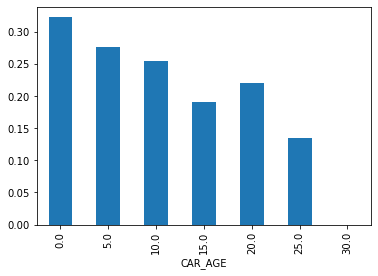

10.0    2360
0.0     1949
5.0     1469
15.0    1387
20.0     447
25.0      37
30.0       1
Name: CAR_AGE, dtype: int64

In [18]:
# Create a copy of the dataset
tmp=train.copy()

# 
tmp['CAR_AGE']=round(tmp['CAR_AGE']/5)*5
itodrop=tmp.loc[tmp['CAR_AGE']<0].index
tmp.drop(index=itodrop,inplace=True)



g=tmp.groupby('CAR_AGE')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['CAR_AGE'].value_counts(sort=True)

Here we see an interesting pattern: the probability of accident decreases with the car age. This is a bit counterintuitive: one may think that newer cars have more advanced safety systems. However, it may be some sort of survivorship bias: maybe unsafe driver do not have old cars because they destroy them before they get old. Or maybe, people which have old cars, are just people which do not use their cars very often, which would decreases the probability of accident. Whatever the cause is, there is a clear correlation between accident probability and car age, and therefore we retain this feature.

#### INCOME

In order to analyse the effect of the INCOME attribute (which is encoded as a text string) we need to convert it in a float value:

In [19]:
tmp['INCOME']=train.dropna()['INCOME'].apply(lambda x: float(x.split('$').pop(1).replace(',','')))

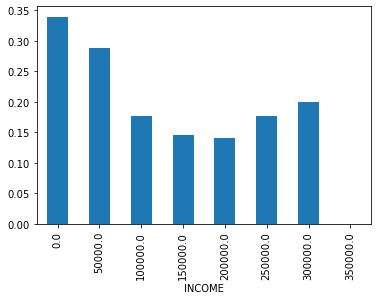

0.0         1421
50000.0     2849
100000.0    1320
150000.0     331
200000.0     100
250000.0      17
300000.0       5
350000.0       1
Name: INCOME, dtype: int64

In [20]:
tmp['INCOME']=tmp['INCOME'].apply(lambda x: np.round(x/50000)*50000 )
g=tmp.groupby('INCOME')['TARGET_FLAG']
P=g.sum()/g.count()
P.plot(kind='bar')
plt.show()
tmp['INCOME'].value_counts().sort_index()

As we can see, another interesting pattern is found: it seems that policy holders with an higher salary are less susceptible to be involved in a car accident. We see that the probability of accident bounce back at very high incomes, but as we can see from the `value_counts()` method, those very high salaries are most likely outliers. In other words, the sample formed by policy holders with more than 200,000\\$ is too small, and we cannot extract a realistic probability estimation from that.

#### BLUEBOOK

In [21]:
tmp['BLUEBOOK']=train.dropna()['BLUEBOOK'].apply(lambda x: float(x.split('$').pop(1).replace(',','')))

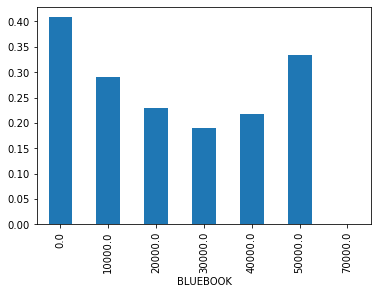

0.0         333
10000.0    2968
20000.0    1990
30000.0     640
40000.0     106
50000.0       6
70000.0       1
Name: BLUEBOOK, dtype: int64

In [22]:
tmp['BLUEBOOK']=tmp['BLUEBOOK'].apply(lambda x: np.round(x/10000)*10000 )
g=tmp.groupby('BLUEBOOK')['TARGET_FLAG']
P=g.sum()/g.count()
P.plot(kind='bar')
plt.show()
tmp['BLUEBOOK'].value_counts().sort_index()

The BLUEBOOK attribute represent the value of the car owned by the policy holder. We see that the probability of accident decreases overall with the value of the car. This is not surprising, since, as we already remarked, policy holders with higher incomes (which are probably the owner of most expensive cars) are less prone to car accidents. However we see quite clearly the presence of outliers: as we can see from the plot, the probability of car accidents is higher for people wich have a cars valued between 50000\\$ and 60000\\$. But as we can see from the value counts, this is most likely a statistical fluctuations due the lack of cars in the dataset in this range of price

#### HOME_VAL

In [23]:
tmp['HOME_VAL']=train.dropna()['HOME_VAL'].apply(lambda x: float(x.split('$').pop(1).replace(',','')))

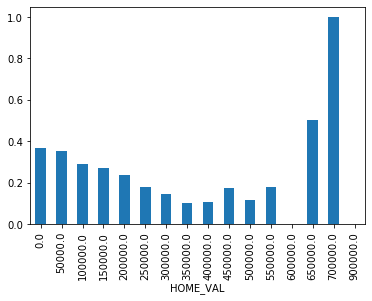

0.0         1816
50000.0       94
100000.0     513
150000.0     938
200000.0    1016
250000.0     773
300000.0     443
350000.0     219
400000.0     115
450000.0      58
500000.0      35
550000.0      17
600000.0       3
650000.0       2
700000.0       1
900000.0       1
Name: HOME_VAL, dtype: int64

In [24]:
tmp['HOME_VAL']=tmp['HOME_VAL'].apply(lambda x: np.round(x/50000)*50000 )
g=tmp.groupby('HOME_VAL')['TARGET_FLAG']
P=g.sum()/g.count()
P.plot(kind='bar')
plt.show()
tmp['HOME_VAL'].value_counts().sort_index()

HOME_VAL attribute represent the value of the home owned by the policy holder. We see that the probability of accident decreases with the value of the home (except for some very sharp peak corresponding to the most valuable homes of the dataset, which are clearly outliers). This is not surprising and reflects the behaviour of the INCOME attribute

#### RED_CAR

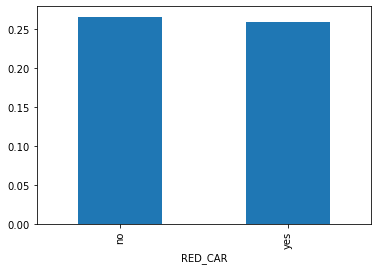

no     5782
yes    2378
Name: RED_CAR, dtype: int64

In [25]:
g=tmp.groupby('RED_CAR')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['RED_CAR'].value_counts(sort=True)

As expected, the color of the car have no influence on the accident probability

#### TRAVTIME

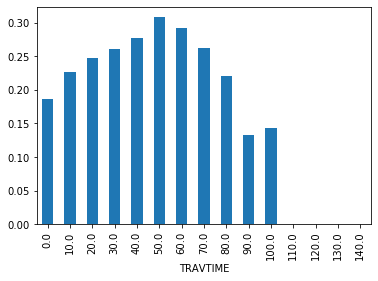

0.0       334
10.0      670
20.0     1621
30.0     1779
40.0     2000
50.0      985
60.0      537
70.0      149
80.0       59
90.0       15
100.0       7
110.0       1
120.0       1
130.0       1
140.0       1
Name: TRAVTIME, dtype: int64

In [26]:
tmp['TRAVTIME']=round(train['TRAVTIME']/10)*10
g=tmp.groupby('TRAVTIME')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['TRAVTIME'].value_counts(sort=True).sort_index()

As we can see, the probability of accident increases with the time travel to the jobplace. We see that the probability of accidents start to decrease for policy holders which travel more than 70 minutes to their job. However, this is most likely due to the presence of outliers: as we can see using the `value_counts()` method, the number of policy holders which travels more than 70 min to their jobplaces is very low, and those policy holders do not really represent a significative sample. 

#### TIF

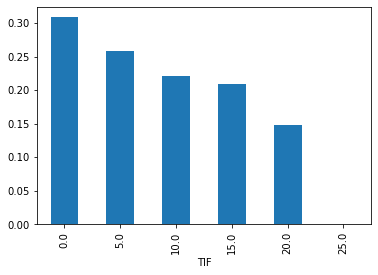

0.0     2539
5.0     3678
10.0    1352
15.0     535
20.0      54
25.0       2
Name: TIF, dtype: int64

In [27]:
tmp['TIF']=round(tmp['TIF']/5)*5
g=tmp.groupby('TIF')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['TIF'].value_counts(sort=True).sort_index()

The TIF attribute stands for *time in force* and it represents the number of years that a given policy holder have been costumer of the insurance company. As we can see, the probability of accident decreases with the TIF attribute.

#### YOJ

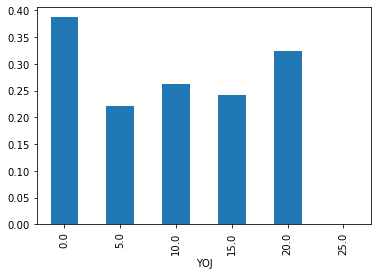

0.0      646
5.0      638
10.0    3814
15.0    2569
20.0      37
25.0       2
Name: YOJ, dtype: int64

In [28]:
tmp['YOJ']=round(tmp['YOJ']/5)*5
g=tmp.groupby('YOJ')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['YOJ'].value_counts(sort=True).sort_index()

YOJ stands for *years on job*, and it represents the number of years a given policy holder has been working at its job. There is no clear dependance of the accident probability on the YOJ attribute, except for a significant peak in 0. This is most likely due to a correlation with age: a large part of people which started their job a few years ago must be constituted by young people which just entered in the job market, and as we know young people are more likely to be involved in accidents.

#### CLM_FREQ

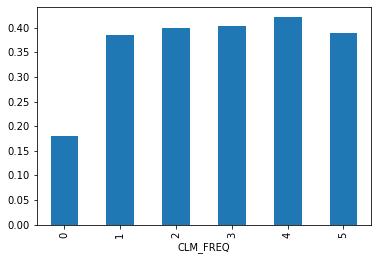

0    5009
1     997
2    1171
3     775
4     190
5      18
Name: CLM_FREQ, dtype: int64

In [29]:
g=tmp.groupby('CLM_FREQ')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['CLM_FREQ'].value_counts(sort=True).sort_index()

CLM_FREQ stands for claims frequency, and it represents the number of accident that a policy holder had in the past. As it is reasonable to expect, policy holders which already have accidents are more likely to have new accidents in future.

#### REVOKED

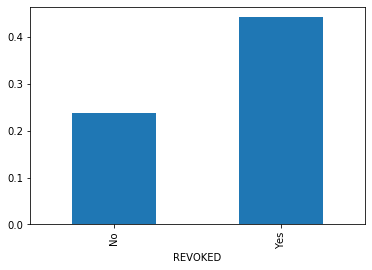

No     7161
Yes     999
Name: REVOKED, dtype: int64

In [30]:
g=tmp.groupby('REVOKED')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['REVOKED'].value_counts(sort=True)

The REVOKED attribute tells us if a policy holder had its driving licence revoked in the past. Not surprisingly, drivers which had their driving licence revoked are more prone to accidents

#### PARENT1

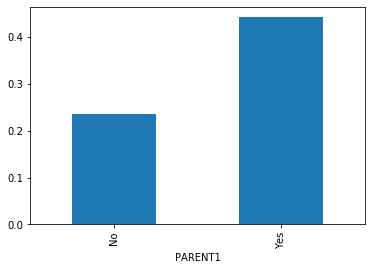

No     7083
Yes    1077
Name: PARENT1, dtype: int64

In [31]:
g=tmp.groupby('PARENT1')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['PARENT1'].value_counts(sort=True).sort_index()

PARENT1 attribute tells us whether the policy holder is a single parent or not. An interesting pattern is found: apparently, single parents are more likely to be involved in car accidents.

#### CAR_USE

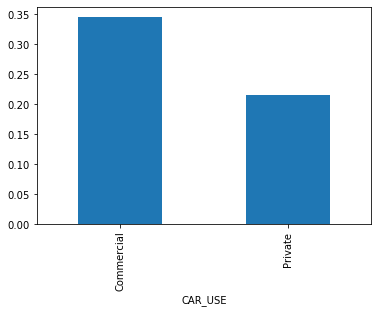

Private       5131
Commercial    3029
Name: CAR_USE, dtype: int64

In [32]:
g=tmp.groupby('CAR_USE')
p=g['TARGET_FLAG'].sum()/g['TARGET_FLAG'].count()
p.plot(kind='bar')
plt.show()
tmp['CAR_USE'].value_counts(sort=True)

CAR_USE attribute describe whether the vehicle is a private or commercial one. As shown in this plot, it turns out that commercial vehicles are more prone to the risk of accident. This is not surprising, because likely commercial vehicles are driven much more than private ones, which increases the probability of collision.

## Data preparation:

We identified the following list of predictors which seem to have an effect on the probability of car accident:

1. KIDSDRIV
2. AGE
3. INCOME
4. PARENT1
5. MSTATUS
6. EDUCATION
7. JOB
8. TRAVTIME
9. CAR_USE
10. TIF
11. CLAIM_FREQ
12. REVOKED
13. MVR_PTS
14. CAR_AGE
15. URBANICITY

Some of these predictors are numerical attributes. 

Before we can train a machine learning algorithm in order to predict probability of car accident, the dataset needs to be prepared. Some of the features contain missing values: machine learning algorithms, in general, are not able to deal with missing values. Therefore, before we can feed a machine learning algorithm with our datas, we need to drop the missing values, or find a way to infer them. Other columns (such as the INCOME one) contain numerical values which are encoded as text string, and we need to encode them as float. Other attributes are categorical (with two or more fixed categories), and we want to encode as number also these features. Moreover, as we have remarked in the previous section, some columns contains outliers, and we want to get rid of them before training our machine learning algorithms.

One solution is to perform all these operations one at the time of each column. This would be feasible, but very boring and time consuming. Moreover, next time we want apply the same transformation to a new dataset with the same structure (which is exactly what will need at the end of the notebook, in order to perform predictions on the test dataset), we will be obliged to perform again all these operation one by one. 

A more elegant solution consist in automate the data cleaning procedure using the `Pipeline()` and `ColumnTransform()` functions of Scikit Learn. The present section is devoted to take care of all these operations.

## Building the pipeline:

First of all, I put the labels of the dataset apart:

In [33]:
train_labels=train['TARGET_FLAG'].copy()

Then, I select the columns to drop (the one referring to non relevant features), and I select the columns referring respectively to numerical, categorical binary, and categorical attributes:

In [34]:
# Drop non relevant columns
col_to_drop=['INDEX','TARGET_FLAG','TARGET_AMT','HOMEKIDS','YOJ','HOME_VAL','SEX','BLUEBOOK','CAR_TYPE','RED_CAR','OLDCLAIM']

# Define numerical attributes
num_attribs=['KIDSDRIV','AGE','INCOME','TRAVTIME','TIF','CLM_FREQ','MVR_PTS','CAR_AGE']

# Define binary categorical attributes
bin_attribs=['PARENT1','MSTATUS','CAR_USE','REVOKED','URBANICITY']

#Define non-binary categorical attributes
cat_attribs=['EDUCATION','JOB']

and I create three dataframes, each of them containing respectively numerical, binary categorical, and categorical attributes:

In [35]:
# Dataframe containing only numerical features
num_train=train.drop(columns=bin_attribs+cat_attribs+col_to_drop)

# Dataframe containing only binary categorical features
bin_train=train.drop(columns=num_attribs+cat_attribs+col_to_drop)

# Dataframe containing only categorical features
cat_train=train.drop(columns=num_attribs+bin_attribs+col_to_drop)

#### Numerical Pipeline

As we have seen, I want to create a pipeline which apply the following transformation to the datas:

1. Transform INCOME to numerical
2. Eliminate outliers from INCOME feature
3. Imputing missing values
4. Rescaling values

The first operation is easy to do with Pandas, using the `apply()` method in the following way:

In [36]:
train['INCOME'].apply(lambda x:  float(x.split('$').pop(1).replace(',','')) if pd.notnull(x) else x)

0        67349.0
1        91449.0
2        16039.0
3            NaN
4       114986.0
          ...   
8156     43112.0
8157    164669.0
8158    107204.0
8159     43445.0
8160     53235.0
Name: INCOME, Length: 8161, dtype: float64

Let's see how this works for a single element of the Series:


In [37]:
ExElm=train['INCOME'][0]
ExElm

'$67,349'

the `split('$')` method separate the string in a list of string, breaking the original string at each occurence of the `'$'` character: 

In [38]:
ExElm.split('$')

['', '67,349']

the `pop(1)` method return the element at index 1 of the list (which is the quantity of interest):

In [39]:
ExElm.split('$').pop(1)

'67,349'

the `replace(',','')` method replace the comma with an empty string:

In [40]:
ExElm.split('$').pop(1).replace(',','')

'67349'

And the built in `float()` function convert the string to float:

In [41]:
float(ExElm.split('$').pop(1).replace(',',''))

67349.0

Finally, the `apply()` method apply this transformation to all the elements of the series. A conditional instruction is also added, in order to preserve the missing values for further elaborations.

However, there is still a missing step in order to include this transformation into the pipeline. In Scikit Learn infact, pipelines has to be fed with special objects, called transformers. Each transformer contains a method called transform() which takes as input datas and return them transformed. 

In the following I define a function `process_income()` which takes as input the entire dataframe and return the dataframe with the modified (i.e. containing float values) INCOME column. Moreover, the `process_income()` function discretise the elements of the INCOME column. The incomes of the policy holders are converted in 5 different categories: >50,000\\$, 50,000\\$ to 100,000\\$, 100,000\\$ to 150,000\\$, 150,000\\$ to 200,000\\$, and >200,000\\$. As a consequence, each categories is represented by an adequate number of policy holders, reducing therefore the effect of outliers

Then I define the transformer `DataframeFunctionTransformer` which takes as input a function acting on dataframe (in our case, it will be `process_income()`), and when the transform method is called on a dataframe, it applies the function on the dataframe.

In [42]:
#Transformer definition:
class DataframeFunctionTransformer():
    def __init__(self, func):
        self.func = func

    def transform(self, input_df, **transform_params):
        return self.func(input_df)

    def fit(self, X, y=None, **fit_params):
        return self

# this function takes a dataframe as input and
# returns a modified version thereof

def process_income(input_df):
    input_df['INCOME'] = input_df['INCOME'].apply(lambda x:  float(x.split('$').pop(1).replace(',','')) if pd.notnull(x) else x)
    
    # Eliminating outliers:
    IncCat=list(np.arange(0,2.5e5,5e4,dtype=int))
    IncCat.append(np.inf)
    input_df['INCOME']=pd.cut(input_df['INCOME'],bins=IncCat,labels=list(np.arange(0,2.5e5,5e4,dtype=int))).astype(float)
    
    return input_df

Let's see how this work with a simple example. First I create an object `DataframeFunctionTransformer()`:

In [43]:
ExmplTransf=DataframeFunctionTransformer(process_income)


and then I call the transform method on the test dataframe:

In [44]:
#Dummy data for test:
ExmplData=train[:10].copy()

ExmplTransf.transform(ExmplData)

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,1,0,0.0,0,60.0,0,11.0,50000.0,No,$0,...,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
1,2,0,0.0,0,43.0,0,11.0,50000.0,No,"$257,252",...,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
2,4,0,0.0,0,35.0,1,10.0,0.0,No,"$124,191",...,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
3,5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",...,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
4,6,0,0.0,0,50.0,0,NaN,100000.0,No,"$243,925",...,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
5,7,1,2946.0,0,34.0,1,12.0,100000.0,Yes,$0,...,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
6,8,0,0.0,0,54.0,0,NaN,0.0,No,NaN,...,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
7,11,1,4021.0,1,37.0,2,NaN,100000.0,No,"$333,680",...,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
8,12,1,2501.0,0,34.0,0,10.0,50000.0,No,$0,...,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
9,13,0,0.0,0,50.0,0,7.0,100000.0,No,$0,...,"$18,510",7,Van,no,$0,0,No,1,17.0,z_Highly Rural/ Rural


As we can see, the INCOME column of the dataframe now contains float values.

Now that we have a transformer which convert to float the elements of the INCOME column, we can create a Pipeline which tranforms all the numerical attributes:

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

num_pipeline=Pipeline([
    ('convert_income', DataframeFunctionTransformer(process_income)),
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',MinMaxScaler())

])

This code is quite self explanatory. We have defined a pipeline made of three transformers: the first one is the `DataFrameFunctionTransformer`, which convert the INCOME column to float values. The second one is the `SimpleImputer` transformer from Scikit Learn, which fills the missing values in the dataframe (in this case, it replaces them with the median value). The third one is the `MinMaxScaler` transformer from Scikit Learn, which rescale all the features bringing their values in the range $[0,1]$.

In order to apply the pipeline, let's call the `fit_transform()` method on the dataframe made of numerical attributes:

In [46]:
# Numerical data prepared
num_train_tr=num_pipeline.fit_transform(num_train)

Let's take a look to the transformed dataset (I put it again in the form of a Pandas dataframe, for sake of readibility):

In [47]:
pd.DataFrame(num_train_tr,columns=num_train.columns)

,KIDSDRIV,AGE,INCOME,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE
0,0.00,0.676923,0.25,0.065693,0.416667,0.4,0.230769,0.677419
1,0.00,0.415385,0.25,0.124088,0.000000,0.0,0.000000,0.129032
2,0.00,0.292308,0.00,0.000000,0.125000,0.4,0.230769,0.419355
3,0.00,0.538462,0.25,0.197080,0.250000,0.0,0.000000,0.290323
4,0.00,0.523077,0.50,0.226277,0.000000,0.4,0.230769,0.645161
...,...,...,...,...,...,...,...,...
8156,0.00,0.292308,0.00,0.335766,0.375000,0.0,0.000000,0.354839
8157,0.25,0.446154,0.75,0.116788,0.583333,0.0,0.153846,0.645161
8158,0.00,0.461538,0.50,0.226277,0.208333,0.0,0.000000,0.129032
8159,0.00,0.523077,0.00,0.226277,0.208333,0.0,0.000000,0.451613


As we can see, the INCOME column is now formed by float values, all the missing values have been replaced, and all the values of the dataframe now fall in the range $[0,1]$.

The numerical datas are now ready to be used in a machine learning algorithm. In the next section, we do the same for the remaining categorical datas.

#### Pipeline for binary categorical datas

Here we want to define a pipeline which prepare the binary categorical features. As we have anticipated, we only want to encode numerically our binary variables. This can be done using the `OrdinalEncoder` transformer of Scikit Learn. 

Let's show with an exemple how it works. First of all we select a small sample from the PARENT1 column:

In [48]:

# Create an example with first 10 entries from PARENT1 column
ExmplParent1=train['PARENT1'].copy()[:10]

# Convert exemple data to numpy array, and reshape them as
# column vector
ExmplParent1=ExmplParent1.to_numpy().reshape(-1,1)
ExmplParent1

array([['No'],
       ['No'],
       ['No'],
       ['No'],
       ['No'],
       ['Yes'],
       ['No'],
       ['No'],
       ['No'],
       ['No']], dtype=object)

As we can see, all element of the array but the one at index 5 are equal to 'No'.

Then we create an `OrdinalEncoder` object, and we call its `fit_transform()` methods on the exemple array:

In [49]:
from sklearn.preprocessing import OrdinalEncoder


# Create an OrdinalEncoder object
ExmplOrdEnc=OrdinalEncoder()


# Call the fit_transform method on the exemple data
ExmplOrdEnc.fit_transform(ExmplParent1)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.]])

As we can see, all the occurrences of `'No'` have been converted to `0`, while the only occurrence of `Yes` has been converted to `1`.

At this point we create a pipeline containing the `OrdinalEncoder` transformer, in order to encode binary categorical attributes as numbers:

In [50]:


bin_pipeline=Pipeline([
    ('imputer_for_binary',SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder',OrdinalEncoder())
    
])

Since our binary categorical variables do not contain missing values, we could only include in the pipeline an `OrdinalEncoder` transformer. However, we want to be able to use the same pipeline on future datasets, which may contain missing values in the binary categorical variables. Therefore we also added a `SimpleImputer` transformer (in this case, we selected `strategy='most_frequent'`, which means it will replace missing values with the most frequent occurrence).

To see how it works, let's call the `fit_transform()` method on the `bin_train` dataset:

In [51]:
bin_train_tr=bin_pipeline.fit_transform(bin_train)

Here there is the original `bin_train` dataset:

In [52]:
bin_train

,PARENT1,MSTATUS,CAR_USE,REVOKED,URBANICITY
0,No,z_No,Private,No,Highly Urban/ Urban
1,No,z_No,Commercial,No,Highly Urban/ Urban
2,No,Yes,Private,No,Highly Urban/ Urban
3,No,Yes,Private,No,Highly Urban/ Urban
4,No,Yes,Private,Yes,Highly Urban/ Urban
...,...,...,...,...,...
8156,No,z_No,Commercial,No,z_Highly Rural/ Rural
8157,No,Yes,Private,No,Highly Urban/ Urban
8158,No,Yes,Commercial,No,Highly Urban/ Urban
8159,No,Yes,Private,No,Highly Urban/ Urban


and here its transformed version, `bin_train_tr`:

In [53]:
pd.DataFrame(bin_train_tr,columns=bin_train.columns).dropna()

,PARENT1,MSTATUS,CAR_USE,REVOKED,URBANICITY
0,0.0,1.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
8156,0.0,1.0,0.0,0.0,1.0
8157,0.0,0.0,1.0,0.0,0.0
8158,0.0,0.0,0.0,0.0,0.0
8159,0.0,0.0,1.0,0.0,0.0


As we can see, the datas are now encoded as `0` and `1`.

#### Categorical attributes

Now we want to build a pipeline which takes care of our categorical attributes JOB and EDUCATION. In principle, we may still use an OrdinalEncoder for these two attributes. For exemple:

In [54]:
# Exemple instances from the JOB column
ExmplJob=train['JOB'].copy()[:10]

# Convert to array and reshape as column vector
ExmplJob=ExmplJob.to_numpy().reshape(-1,1)
ExmplJob

array([['Professional'],
       ['z_Blue Collar'],
       ['Clerical'],
       ['z_Blue Collar'],
       ['Doctor'],
       ['z_Blue Collar'],
       ['z_Blue Collar'],
       ['z_Blue Collar'],
       ['Clerical'],
       ['Professional']], dtype=object)

In [55]:
# Exemple of OrdinalEncoder
ExmplEnc=OrdinalEncoder()

# Ordinally encode the exemple instances
ExmplJob_tr=ExmplEnc.fit_transform(ExmplJob)
ExmplJob_tr

array([[2.],
       [3.],
       [0.],
       [3.],
       [1.],
       [3.],
       [3.],
       [3.],
       [0.],
       [2.]])

However, when categorical variables are ordinally encoded, machine learning algorithms may assume that instances encoded as close numbers are in some way more similar than two distant values. This is not always the case, and for this reason it is prefered to use the so called one hot encoding.

Basically, for each category of the categorical variable, a binary attribute is created. When an istance fall in a given category, all but the corresponding newly created attribute are equal to zero, and the remaining one is set to 1. This can be easily done with the `OneHotEncoder` transformer from Scikit Learn.

We show with an exemple how it works:

In [56]:
# Exemple instances from the JOB column
ExmplJob=train['JOB'].copy()[:10]

# Convert to array and reshape as column vector
ExmplJob=ExmplJob.to_numpy().reshape(-1,1)
ExmplJob

array([['Professional'],
       ['z_Blue Collar'],
       ['Clerical'],
       ['z_Blue Collar'],
       ['Doctor'],
       ['z_Blue Collar'],
       ['z_Blue Collar'],
       ['z_Blue Collar'],
       ['Clerical'],
       ['Professional']], dtype=object)

In [57]:
from sklearn.preprocessing import OneHotEncoder

# An istance of the class OneHotEncoder
ExmplEnc=OneHotEncoder()

# Encode the exemple datas:
ExmplJob_tr=ExmplEnc.fit_transform(ExmplJob)
ExmplJob_tr.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

As we can see, the exemple datas are now encoded as a matrix made of `0` and `1`. The elements appartaining to the `'Professional'` category are all encoded as `[0.,0.,1.,0.]`, the elements appartaining to the `'z_Blue Collar'` category are all encoded as `[0.,0.,0.,1.]`, and so on.

Now we can implement the OneHotEncoder in a pipeline, in order that it takes care of all categorical variables in a single time:

In [58]:
from sklearn.preprocessing import OneHotEncoder


cat_pipeline=Pipeline([
    ('imputer_for_cat',SimpleImputer(strategy='most_frequent')),
    ('OneHotEncoder',OneHotEncoder())
])

We apply the `fit_transform()` method of the pipeline on the `cat_train` dataset (the one formed only by attributes JOB and EDUCATION):

In [59]:
cat_train_tr=cat_pipeline.fit_transform(cat_train)

As we can see, each instance of the dataset `cat_train` has been transformed in a vector containing all `0` but two elements, which corresponds to the categories of the attributes JOB and EDUCATION:

In [60]:
cat_train_tr.toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### The full pipeline

In the previous sections, we have shown how we can build a pipeline for each of the three types of attributes present in our dataset (numerical, binary, categorical).

Scikit Learn offers the possibility to put all the pipelines together, in order to apply all the required transformation directly on the full dataset.

This can be done using the `ColumnTransformer` class. An istance of the `ColumnTransformer` class must be fed with a list of triples, each of them corresponding to one of the pipelines we have defined in the previous section. The first element of the tuple is a string which identifies the corresponding transformation, the second element is one of the three pipelines defined before, and the third element is a list containing the name of columns on which the current pipeline must act:

In [61]:
from sklearn.compose import ColumnTransformer 

full_pipeline=ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('bin',bin_pipeline,bin_attribs),
    ('cat',OneHotEncoder(),cat_attribs)
])

Now the full pipeline has been defined. Similarly to what done before, we can now call the `fit_transform` method of the pipeline on the full dataframe, in order to get the full prepared dataset:

In [62]:
train_tr=full_pipeline.fit_transform(train)

And our dataset preparation procedure is concluded! Now the `full_pipeline` transformer allows us to prepare a dataset in just one single command.

At the end of this notebook, when we will have a machine learning model trained on our dataset, we will need to prepare the `test` dataset in order to make prediction from it. Instead to prepare it transformin each feature by hand, we will just need to call the `transform()` method of `full_pipeline` on it (one should remark that we will call `transform()` instead of `fit_transform()` : we do not want that the variable of the test dataset are encoded differently than in the training dataset)

Now we are ready to train our machine learning model on our dataset.

## Logistic Regression model

In this section, I train a simple logistic regression model in order to predict if a policy holder will be involved in a car accident or not.

Logistic Regression is a binary classifier in which the probability of an istance $\mathbf{x}$ to appartain to the positive class $y=1$ is given by:

$$ P(y=1|\mathbf{x}) = \sigma(\mathbf{w}^T\mathbf{x} + b) $$ 

where $\mathbf{w}$ is the weights vector having the same dimension of $\mathbf{x}$, b is a scalar (called intercept, or bias term), and $\sigma(a)$ is the so called sigmoid function:

$$ \sigma(a) =\frac{1}{1+exp(-a)}$$

The weights vector and the bias term define a hyperplane in the features space ($\mathbf{w}$ determines the orientation, and $b$ fixes the distance from the origin). Basically, logistic regression assign to one class the instances which are on one side of the hyperplane, and to other class the other ones. For this reason, the hyperplane defined by $\mathbf{w}$ and $b$ is also called decision bounduary. The equation of this hyperplane is given by: 

$$ \mathbf{w}^T\mathbf{x}+b=0 $$

where the quantity $\mathbf{w}^T\mathbf{x}+b$ is called *decision function*.

Let $\{\mathbf{x}_n\}_n$ be our training datas, and let $\{y_n\}_n$ the corrisponding class labels. Training the model means to find the set of weigths $\mathbf{w}$ and the bias term $b$ which makes the predictions of the model as close as possible to the actual labels. In other words, one has to find the weigths and the bias term which minimise the Negative Log Likelihood ($NLL(\mathbf{w},b)$):

$$ NLL(\mathbf{w},b) = - \sum_n \log{p(y=y_n|\mathbf{x}_n)} $$



All these steps (i.e. creation of the model, training, and prediction) can be done using Scikit Learn. 




Since in logistic regression the decision bounduary is intrinsecally linear, this model risks to badly perform when instances are distributed across the classes according complex patterns. However, this is the most simple binary classifier, and it is interesting to see how it performs on our datas

We start splitting our dataset in a training dataset and a validation dataset. We do that because we want to evaluate our model (and eventually to tune its parameters) on datas which have not been seen during the training procedure. This will help us to limit the risk of overfit. This can be done using the `train_test_split()` function:

In [63]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_tr,train_labels,test_size=0.20,random_state=42)

We create an instance of the `LogisticRegression` class:

In [64]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression()

and we train it on the training set:

In [65]:
lr_clf.fit(X_train,y_train)


LogisticRegression()

Now we have trained our logistic classifier. In order to evaluate it, we want to make prediction on the validation set and confront them with the true labels. We can make predictions using the `predict` method:

In [66]:
# Predictions on validation set
pred_val=lr_clf.predict(X_val)

Now we are ready how good these predictions are. The most basic measure of performance of a binary classifier is the accuracy, which is defined as the ratio between the correct predictions and the total number of instances:

$$ \text{accuracy} = \frac{ TN + TP}{TN + TP + FN + FP} $$

where TN,TP,FN,FP stand respectively for true negatives, true positives, false negatives, false positives. Clearly, a perfect classifier would classify correctly all the instances, and therefore would have unitary accuracy. The accuracy of the classifier can be calculated via the `score()` method:

In [67]:
lr_clf.score(X_val,y_val)

0.7746478873239436

Here we see that our classifier has an accuracy of $\sim77\%$, which may seems a good value. However, when the datas are very umbalanced (i.e. when one class is much more common than the other, as it's the case in our problem), accuracy is not the best measure of the classifier's performance. Let's assume to have a dataset with 99 negative instances and just one positive instance, and let's suppose to have a dumb classifier which attributes all the instances to the negative class. This classifier would clearly be a bad classifier (i.e. it would be totally unable to recognise positive instances), and despite of that it would achieve an accuracy of $99\%$.

When datas are skewed, as it is our case, a much better measure of performance is given by the confusion matrix, which is defined as:

$$ \text{confusion matrix}=\left ( \begin{matrix} TN & FP \\ FN & TP \end{matrix} \right )$$

The confusion matrix can be calculated using the `confusion_matrix()` function:

In [68]:
from sklearn.metrics import confusion_matrix
print('Total instances of validation set: %d'% y_val.count() )
print('Negative instances in validation set: %d'% (y_val.count()- y_val.sum()) )
print('Positive instances in validation set: %d'% y_val.sum())

# Print the confusion matrix
confusion_matrix(y_val,pred_val)

Total instances of validation set: 1633
Negative instances in validation set: 1189
Positive instances in validation set: 444


array([[1110,   79],
       [ 289,  155]])

As we can see, the number of false negatives (289) is much larger than the number of true positives (155), which means that most of the positive instances are uncorrectly classified. Even worst, we see that the total number of instances classified as positives (i.e. the sum of false positives and true positives): 

$$ TP + FP = 234 $$ 

is almost the half of the total number of positive instances. **This is a big issue for an insurance company** beacuse it means that the number of accident will be underestimated of almost $50\%$. As a consequence, at the end of the year (assuming for sake of simplicity that each accident cost the same amount of money) the company will have to pay almost the double than our model predicted.

This shows how, despite having an high accuracy, our model does not perform very well.

The confusion matrix contains a lot of information, but sometimes it is preferable to use a metric that condenses all these information in just one number. This is the reason because of we define the precision:

$$ \text{precision} = \frac{TP}{TP + FP} $$

and the recall:

$$\text{recall} = \frac{TP}{TP+FN}$$

The precision represent the probability that an instance is positive *knowing that it has been classified as positive*. The recall represents the probability that an instance is classified as positive *knowing that it is positive*. We can calculate recall and precision using the functions `precision_score()` and `recall_score()`:

In [69]:
from sklearn.metrics import precision_score,recall_score
# Calculate precision of our classifier
precision_val=precision_score(y_val,pred_val)

# Calculate recall of our classifier
recall_val=recall_score(y_val,pred_val)

# Print results:
print('Precision=%f'% precision_val)
print('Recall=%f'% recall_val)

Precision=0.662393
Recall=0.349099


As we can see, our classifier has a precision of around $\sim 0.66$, while it has a recall of $\sim 0.35$. An high precision means that if an instance is classified as positive, there are high chances that it is really positive. An high recall, on the other hand, means that if an instance is positive, it is likely that the classifier will correctly recognise it as positive. 

In terms of our insurance problem, an high precision, means that the policy holders which have been classified as unsafe, are probably actual unsafe drivers. On the other hand, an high recall means that if a policy holder is an unsafe driver, it is probable that the classifier will correctly classify him as an unsafe driver.

Precision and recall taken alone do not allow to assess the goodness of the classifier. With reference to our insurance problem, an high precision would tell us that most of the policy holders classified as unsafe drivers are really unsafe drivers (i.e., very low number of false positives), but does not tell us anything about all the policy drivers which have erroneously been classified as safe (i.e. about the number of false negatives). We may be in the case where most of the users classified as dangerous are actually dangerous, *but most of the dangerous users are not classified as dangerous*. An high recall, on the other hand, would tell us that most of the dangerous drivers have been correctly classified as unsafe, but there is still the possibility that many safe drivers have been classified as unsafe as well.

In the case of an insurance company, it is of mandatory importance to correctly assess the number of accidents, because this quantity is directly related to the amount of money that the insurance will pay to its policy holders. If we underestimate the number of accidents occurring to the policy holders, the policies will be probably underpriced, and at the end of the year the company will have to pay much more money than expected. Of course we want to avoid that.

In term of our machine learning model, in other words, we want to increase the recall as much as possible, in order to be sure to correctly individuate (almost) all the unsafe policy holders (and therefore to not underestimate the number of accidents).   

A way to increase the recall is to decrease the threshold on the basis of which the decision function decide wether the users are safe or unsafe. If I reduce this threshold (which by default is set to zero) the number of false positives will increases, but the number of false negatives will decreases, leading therefore to an improvement of the recall. Let's see how it can be done. We can access the decision function with the `decision_function()` method:

In [70]:
# Evaluate the decision function for each 
# instance of the validation set:
dec_func_val=lr_clf.decision_function(X_val)

# Print max and min values:
print('decision function max value=%f'% dec_func_val.max() )
print('decision function min value=%f'% dec_func_val.min() )



decision function max value=2.265135
decision function min value=-4.999617


As we can see, the maximum value that the decision function assume on the validation set is around 2.26, while the minimum value is -4.99 

By default, all instances on which decision function assume a positive value are classified as positive class (unsafe driver), and all the instances for which the decision function assume a negative value are attributed to the negative class (safe driver). In other words, by default, the threshold is zero. Let's now try decrease a bit the threshold, taking for exemple `threshold=-1`

In [71]:
# Set the threshold
threshold=-1

# Assign the instance for which decision function is greater than threshold
# to the positive class
pred_with_thrsld=(dec_func_val>=threshold)
pred_with_thrsld

array([False, False, False, ...,  True,  True, False])

As a result we have a boolean array, where `True` corresponds to the instances classified as positive, and `False` correspond to the instances classified as negative (Scikit-Learn is indifferently able to treat labels encoded as `int` and `bool`). Let's now calculate the precision and the recall on the predictions made with the new threshold:

In [72]:
# Evaluate precision
precision_thrsld=precision_score(y_val,pred_with_thrsld)
# Evaluate recall
recall_thrsld=recall_score(y_val,pred_with_thrsld)

# Print recall and precision:
print('Precision with threshold=%f'%precision_thrsld)
print('Recall with threshold=%f'%recall_thrsld)


Precision with threshold=0.493130
Recall with threshold=0.727477


As expected, the recall has increased. Now our model has the $73\%$ of probability to correctly classify an unsafe driver! However, it comes at a price. Lowering the threshold implies to increase the number of false positives, which means that the precision will decrease. In other words, it is true that most of the unsafe drivers are now correctly classified, but half of the policy holders classified as unsafe are actually safe drivers.

On one hand, we may think that this is not a big deal: after all, if we are able to correctly individuate all the unsafe drivers, it does not matter that much if we also misclassify many safe drivers. Better overestimate the number of accidents than underestimate it. On the other hand, an insurance company cannot afford a too low precision neither: if many safe drivers are erroneously classified as unsafe, their policy cost will increase, and they may think to search another company to have their car insured.

In other words, we need to search for a precision/recall trade-off. We can have an idea of how it can be done taking a look to the confusion matrix:

In [73]:
conf_mat_thrsld=confusion_matrix(y_val,pred_with_thrsld)
print(conf_mat_thrsld)

[[857 332]
 [121 323]]


As expected, the number of false negatives is now lesser than the number of true positives (that's why we have a greater recall. However, we also see that the total number of instances classified as positives (i.e. false positives + true positives) is actually greater than the total number of positive instances:

$$ TP + FP = 323 + 332 = 655 \gt 444 = 323 + 121 = TP + FN $$

This means that **we are actually overestimating the number of total accidents**. 

This suggests a strategy to find a trade-off between precision and recall: we may search for a threshold such that the total number of predicted accidents (including false positives) is equal to the number of total accidents (including false negatives). We will obtain a lower recall than the one found using `threshold=-1`, and therefore we will identify less unsafe drivers, but we will obtain also an higher precision, and we will misclassify a bit less of safe drivers. Moreover, we will still able to predict the correct number of accidents, which means that (more or less) we will be able to give a correct estimation of the amount of money to be paid to the policy holders.

In order to do that, we can use the `precision_recall_curve()` function. This function, takes as input the labels and the decision function evaluated on a given dataset, and return the precision and the recalls calculated for several values of the threshold:

In [74]:
from sklearn.metrics import precision_recall_curve

# Calculate precisions, recalls, and thresholds
precisions, recalls, thresholds= precision_recall_curve(y_val,dec_func_val)

We want to find the threshold for which the total number of driver classified as unsafe is equal to the number of unsafe drivers:

$$ TP + FP = TP + FN $$

which is equivalent to impose that:

$$ \frac{TP + FP}{TP + FN} = 1 $$

This problem can be easily reformulated in terms of precision and recall. Using the definitions given above, we see that:

$$ \frac{TP + FP}{TP + FN} = \text{recall} + \frac{FP}{TP + FN}$$

Moreover, using the definition of precision, we have that:

$$ \frac{FP}{TP} = \frac{1-\text{precision}}{\text{precision}} $$

Therefore, the problem:

$$ \frac{TP + FP}{TP + FN} = 1 $$

becomes equivalent to:

$$ \text{recall} + \frac{1-\text{precision}}{\text{precision}}\cdot \text{recall} =1 $$

which can be easily solved with the following code:

Target threshold=-0.541927


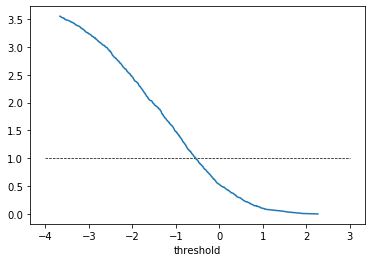

In [75]:
# Define the target function

TargetFun=recalls + ( (1-precisions)/precisions)*recalls
TargetFun=TargetFun[:-1]

# Plot the function:
plt.plot(thresholds,TargetFun)
plt.hlines(1,-4,3,'k','--',linewidth=0.7)
plt.xlabel('threshold')

# Find the index for which the Target function is closest to 1
idx=np.abs(TargetFun-1).argmin()

# Find the threshold for which number of predicted accidents
# is equal to the actual number of accidents
TargetThresld=thresholds[idx]
print('Target threshold=%f'% TargetThresld)

As we can see calculating the confusion matrix using the newly found threshold:

In [76]:
confusion_matrix(y_val, (dec_func_val>=TargetThresld))

array([[998, 191],
       [191, 253]])

The number of false positives is now equal to the number of false negatives, and therefore the number of predicted accidents equals the actual number of accidents.

So, to recap the results of this section: I build a logistic regression classifier, and I trained it on the training dataset. Then, I evaluated it on the validation dataset. I discussed several metrics to evaluate the  performance of the classifier, and I proposed a way to find a trade-off between precision and recall.

However, how we have seen, the model is still performing quite poorly. This may be due to the linear nature of the logistic regression, which makes this algorithm unable to identify complex patterns in the space of features. In next section, I test a non-linear model in order to overcome this difficulty.

## Multilayer Perceptron Classifier

In the previous section I built a logistic regression classifier which estimates the probability that a given policy holder will have an accident or not. However, as we have discussed, logistic regression is a linear model, and therefore it is not able to detect complex patterns in the feature space.

For this reason, in this section, we build and train a neural network, which are a powerful instrument able to detect nonlinear patterns in datas.


Neural networks can be built and trained using the `tensorflow` library:

In [77]:
import tensorflow as tf
from tensorflow import keras

We still use the training and the validation set defined in the previous section. Contrarily to Scikit Learn, tensorflow is not able to take as input Pandas series, and therefore we convert them to numpy array before to use them:

In [78]:
y_train=y_train.to_numpy()
y_val=y_val.to_numpy()

We start testing a simple neural network made of just one layer with 50 hidden units. A multilayer perceptron can be built using the `Sequential()` API from keras, which takes as input a list of `layer` objects: 

In [79]:
mlp_clf_1l=keras.models.Sequential([
    keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:]),

    keras.layers.Dense(1,activation='sigmoid')
])

This code is quite self-explanatory: first of all, we add a first hidden layer, which contains 50 hidden units, each of them having the ReLU activation function. Then, we add an output layer made of just a single neuron, having the sigmoid function as activation. We chose the sigmoid for the output because it returns a probability (exactly as the logistic regression does): the output of the neural network will be the probability that a given instance appartains to the positive class.

Then, using the `compile()` method, we specify the loss function, the optimizer used to search the minimum of the loss function, and the other metrics that we want to calculate during the training.

In [80]:
mlp_clf_1l.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Recall'])

As loss function, we use the binary crossentropy (which is the same loss function of logistic regression, and which is the standard choice for binary classification problems), as optimizer we use the Adam, and as metrics we use the accuracy and the recall, which have been previously defined.


Finally, using the `fit()` method, we train our single-layer perceptron on the training set. We feed this function with the validation set, so that at each epoch the loss, the accuracy, and the recall will be also evaluated on the validation set. The details of the training procedure are saved in the `history_1l`. This object contain a `history` attribute, where are stored the loss, accuracy and recall at each step of the optimization procedure.

In [81]:
history_1l=mlp_clf_1l.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Train on 6528 samples, validate on 1633 samples
Epoch 1/100
6528/6528 [==============================] - 5s 842us/sample - loss: 0.5443 - accuracy: 0.7284 - Recall: 0.0655 - val_loss: 0.4954 - val_accuracy: 0.7526 - val_Recall: 0.1599
Epoch 2/100
6528/6528 [==============================] - 2s 347us/sample - loss: 0.4740 - accuracy: 0.7707 - Recall: 0.2680 - val_loss: 0.4730 - val_accuracy: 0.7746 - val_Recall: 0.3514
Epoch 3/100
6528/6528 [==============================] - 2s 308us/sample - loss: 0.4635 - accuracy: 0.7747 - Recall: 0.3470 - val_loss: 0.4702 - val_accuracy: 0.7759 - val_Recall: 0.4167
Epoch 4/100
6528/6528 [==============================] - 1s 155us/sample - loss: 0.4608 - accuracy: 0.7786 - Recall: 0.3768 - val_loss: 0.4683 - val_accuracy: 0.7753 - val_Recall: 0.3536
Epoch 5/100
6528/6528 [==============================] - 1s 130us/sample - loss: 0.4587 - accuracy: 0.7823 - Recall: 0.3768 - val_loss: 0.4666 - val_accuracy: 0.7734 - val_Recall: 0.3694
Epoch 6/100
6528/

6528/6528 [==============================] - 1s 122us/sample - loss: 0.4289 - accuracy: 0.7995 - Recall: 0.4494 - val_loss: 0.4677 - val_accuracy: 0.7783 - val_Recall: 0.4234
Epoch 45/100
6528/6528 [==============================] - 1s 122us/sample - loss: 0.4285 - accuracy: 0.7973 - Recall: 0.4441 - val_loss: 0.4698 - val_accuracy: 0.7753 - val_Recall: 0.3716
Epoch 46/100
6528/6528 [==============================] - 1s 123us/sample - loss: 0.4272 - accuracy: 0.7984 - Recall: 0.4383 - val_loss: 0.4717 - val_accuracy: 0.7777 - val_Recall: 0.3896
Epoch 47/100
6528/6528 [==============================] - 1s 123us/sample - loss: 0.4273 - accuracy: 0.7984 - Recall: 0.4470 - val_loss: 0.4697 - val_accuracy: 0.7740 - val_Recall: 0.3851
Epoch 48/100
6528/6528 [==============================] - 1s 121us/sample - loss: 0.4268 - accuracy: 0.7995 - Recall: 0.4429 - val_loss: 0.4710 - val_accuracy: 0.7771 - val_Recall: 0.3896
Epoch 49/100
6528/6528 [==============================] - 1s 131us/sample

Epoch 88/100
6528/6528 [==============================] - 1s 110us/sample - loss: 0.4116 - accuracy: 0.8062 - Recall: 0.4693 - val_loss: 0.4801 - val_accuracy: 0.7783 - val_Recall: 0.4054
Epoch 89/100
6528/6528 [==============================] - 1s 122us/sample - loss: 0.4098 - accuracy: 0.8104 - Recall: 0.4862 - val_loss: 0.4830 - val_accuracy: 0.7740 - val_Recall: 0.3784
Epoch 90/100
6528/6528 [==============================] - 1s 110us/sample - loss: 0.4095 - accuracy: 0.8139 - Recall: 0.4886 - val_loss: 0.4798 - val_accuracy: 0.7697 - val_Recall: 0.4347
Epoch 91/100
6528/6528 [==============================] - 1s 111us/sample - loss: 0.4101 - accuracy: 0.8127 - Recall: 0.4997 - val_loss: 0.4813 - val_accuracy: 0.7716 - val_Recall: 0.3964
Epoch 92/100
6528/6528 [==============================] - 1s 115us/sample - loss: 0.4092 - accuracy: 0.8099 - Recall: 0.4827 - val_loss: 0.4841 - val_accuracy: 0.7710 - val_Recall: 0.3784
Epoch 93/100
6528/6528 [==============================] - 1s

Here we plot the metrics evaluated at each step of the training procedure on both the training and the validation set:

Text(0, 0.5, 'Recall')

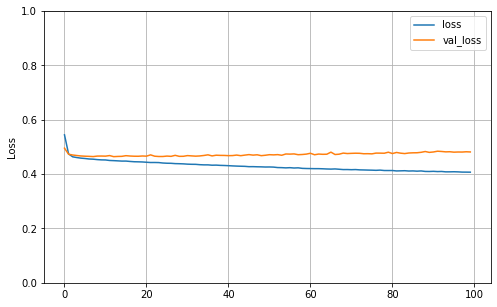

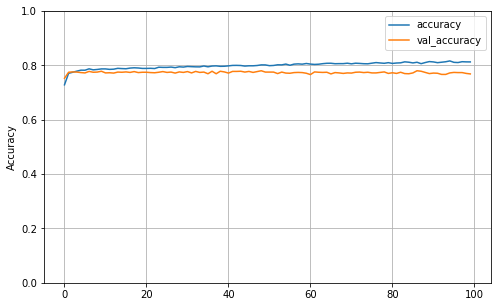

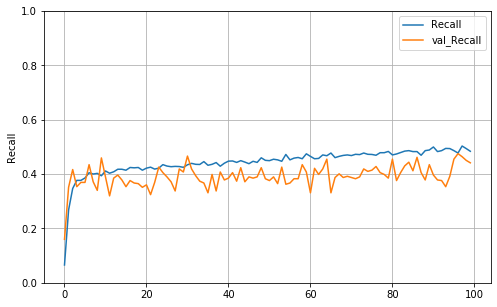

In [82]:
pd.DataFrame({ keys: history_1l.history[keys] for keys in ['loss','val_loss']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Loss')

pd.DataFrame({ keys: history_1l.history[keys] for keys in ['accuracy','val_accuracy']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Accuracy')

pd.DataFrame({ keys: history_1l.history[keys] for keys in ['Recall','val_Recall']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Recall')

As we can see, the loss evaluated on the validation set is sligthly greater than the loss evaluated on the training set, while the accuracy and the recall on the validation set are slightly lower. This is expected, because the algorithm does not see the validation data during the training. However, the difference is not that big, which means that we are not overfitting too much over the training set.

We may now want compare the logistic classifier defined before to the single layer multilayer perceptron that we just trained. A good way to do that is to draw the precision-recall curve on the validation set for both the classifiers. The classifier with the curve closer to the top right corner of the plot will be the better one, because it means that, for fixed precision, it has a better recall. The precision recall curve can be drawn using the `precision_recall_curve()` function:

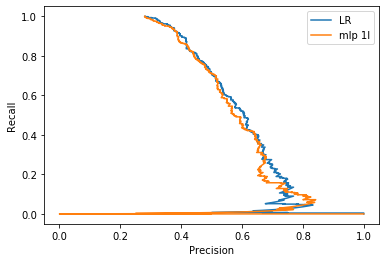

In [83]:
# Get precision and recall for logistic classifier
precision_lr,recall_lr,thrsld_lr=precision_recall_curve(y_val,lr_clf.decision_function(X_val))

# Get precision and recall for 1-layer mlp
precision_mlp_1l,recall_mlp_1l,thrsld_mlp_1l=precision_recall_curve(y_val,(mlp_clf_1l.predict(X_val)+0.001) )

# Plot the curves
plt.plot(precision_lr,recall_lr, label='LR')
plt.plot(precision_mlp_1l,recall_mlp_1l,label='mlp 1l')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.legend()

As we can see, there is apparently not a huge difference in performance between the logistic regressor and the multilayer perceptron. Maybe it depends on the fact that our network is too shallow and/or it does not contain enough parameters to correctly capture the non linear nature of the datas. In order to check this, we try to build and train a network with one more layer.

We build a network as the one of before, but we add one more hidden layer formed by 30 units:

In [84]:
mlp_clf_2l=keras.models.Sequential([
    keras.layers.Dense(50,activation='relu',input_shape=X_train.shape[1:]),
    keras.layers.Dense(30,activation='relu'),



    keras.layers.Dense(1,activation='sigmoid')
])

And we compile and fit as done before:

In [85]:
mlp_clf_2l.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy','Recall'])

In [86]:
history_2l=mlp_clf_2l.fit(X_train,y_train,epochs=100,validation_data=(X_val,y_val))

Train on 6528 samples, validate on 1633 samples
Epoch 1/100
6528/6528 [==============================] - 2s 374us/sample - loss: 0.5393 - accuracy: 0.7364 - Recall: 0.1047 - val_loss: 0.4842 - val_accuracy: 0.7655 - val_Recall: 0.3446
Epoch 2/100
6528/6528 [==============================] - 1s 125us/sample - loss: 0.4712 - accuracy: 0.7763 - Recall: 0.3552 - val_loss: 0.4713 - val_accuracy: 0.7722 - val_Recall: 0.3874
Epoch 3/100
6528/6528 [==============================] - 1s 126us/sample - loss: 0.4648 - accuracy: 0.7760 - Recall: 0.3950 - val_loss: 0.4748 - val_accuracy: 0.7697 - val_Recall: 0.3176
Epoch 4/100
6528/6528 [==============================] - 1s 126us/sample - loss: 0.4595 - accuracy: 0.7843 - Recall: 0.4102 - val_loss: 0.4685 - val_accuracy: 0.7740 - val_Recall: 0.3468
Epoch 5/100
6528/6528 [==============================] - 1s 126us/sample - loss: 0.4569 - accuracy: 0.7811 - Recall: 0.4108 - val_loss: 0.4648 - val_accuracy: 0.7832 - val_Recall: 0.4324
Epoch 6/100
6528/

6528/6528 [==============================] - 1s 135us/sample - loss: 0.3946 - accuracy: 0.8153 - Recall: 0.5067 - val_loss: 0.4912 - val_accuracy: 0.7697 - val_Recall: 0.3986
Epoch 45/100
6528/6528 [==============================] - 1s 135us/sample - loss: 0.3929 - accuracy: 0.8163 - Recall: 0.5161 - val_loss: 0.4901 - val_accuracy: 0.7673 - val_Recall: 0.3829
Epoch 46/100
6528/6528 [==============================] - 1s 132us/sample - loss: 0.3933 - accuracy: 0.8156 - Recall: 0.5044 - val_loss: 0.4875 - val_accuracy: 0.7667 - val_Recall: 0.4392
Epoch 47/100
6528/6528 [==============================] - 1s 134us/sample - loss: 0.3917 - accuracy: 0.8169 - Recall: 0.5114 - val_loss: 0.4918 - val_accuracy: 0.7655 - val_Recall: 0.4414
Epoch 48/100
6528/6528 [==============================] - 1s 134us/sample - loss: 0.3905 - accuracy: 0.8185 - Recall: 0.5255 - val_loss: 0.4929 - val_accuracy: 0.7697 - val_Recall: 0.4189
Epoch 49/100
6528/6528 [==============================] - 1s 132us/sample

Epoch 88/100
6528/6528 [==============================] - 1s 136us/sample - loss: 0.3472 - accuracy: 0.8399 - Recall: 0.5816 - val_loss: 0.5393 - val_accuracy: 0.7600 - val_Recall: 0.4144
Epoch 89/100
6528/6528 [==============================] - 1s 131us/sample - loss: 0.3478 - accuracy: 0.8367 - Recall: 0.5851 - val_loss: 0.5403 - val_accuracy: 0.7569 - val_Recall: 0.4414
Epoch 90/100
6528/6528 [==============================] - 1s 132us/sample - loss: 0.3470 - accuracy: 0.8408 - Recall: 0.5886 - val_loss: 0.5430 - val_accuracy: 0.7606 - val_Recall: 0.3784
Epoch 91/100
6528/6528 [==============================] - 1s 141us/sample - loss: 0.3465 - accuracy: 0.8384 - Recall: 0.5834 - val_loss: 0.5402 - val_accuracy: 0.7593 - val_Recall: 0.4054
Epoch 92/100
6528/6528 [==============================] - 1s 156us/sample - loss: 0.3449 - accuracy: 0.8407 - Recall: 0.5793 - val_loss: 0.5444 - val_accuracy: 0.7606 - val_Recall: 0.4685
Epoch 93/100
6528/6528 [==============================] - 1s

Let's take a look to the loss, the accuracy, and the recall of the 2-layers network:

Text(0, 0.5, 'Recall')

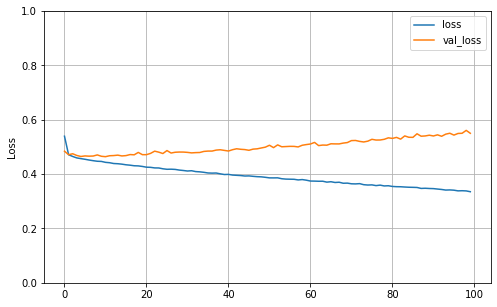

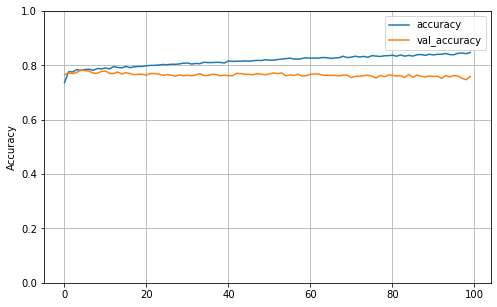

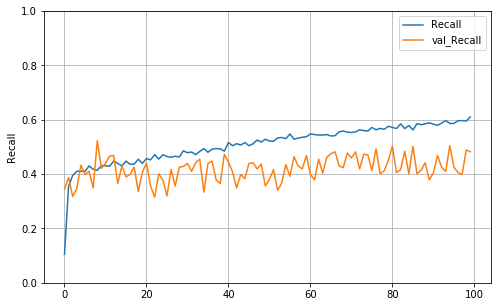

In [87]:
pd.DataFrame({ keys: history_2l.history[keys] for keys in ['loss','val_loss']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Loss')
pd.DataFrame({ keys: history_2l.history[keys] for keys in ['accuracy','val_accuracy']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Accuracy')
pd.DataFrame({ keys: history_2l.history[keys] for keys in ['Recall','val_Recall']}).plot(figsize=(8,5))
plt.grid(True)
plt.ylim(0,1)
plt.ylabel('Recall')

As we can see, the accuracy and the recall measured on the training set are greater compared to the 1-layer network, while the accuracy and the recall measured on the validation set are more or less the same. This may be an indication that we are overfitting the training data. 

Let's now use the precision recall curve to compare the performance of the 2-layers network with the the performance of the logistic regressor:

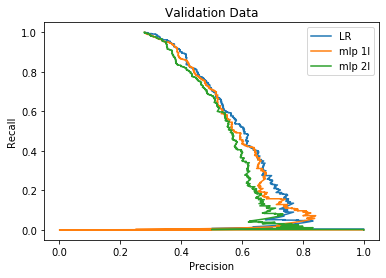

In [88]:
# Get precision and recall for logistic classifier
precision_lr,recall_lr,thrsld_lr=precision_recall_curve(y_val,lr_clf.decision_function(X_val))

# Get precision and recall for 1-layer mlp
precision_mlp_1l,recall_mlp_1l,thrsld_mlp_1l=precision_recall_curve(y_val,(mlp_clf_1l.predict(X_val)) )

# Get precision and recall for 2-layer mlp
precision_mlp_2l,recall_mlp_2l,thrsld_mlp_2l=precision_recall_curve(y_val,(mlp_clf_2l.predict(X_val)) )

# Plot the curves
plt.plot(precision_lr,recall_lr, label='LR')
plt.plot(precision_mlp_1l,recall_mlp_1l,label='mlp 1l')
plt.plot(precision_mlp_2l,recall_mlp_2l,label='mlp 2l')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Validation Data')
plt.legend()

As we can see, not only adding one more layer does not improve the performance of our classifier, but it even get worst. This is because, as suggested before, we are overfitting the training data. This means that the the 2-layers multilayer perceptron - thanks to its large number of parameters - is learning complex patterns in the feature space. But these patterns are not actual patterns of datas, which would apply also to the validation set: it is just the noise on the training set. In order to see that, we plot the precision-recall curve for our three models on the training set:

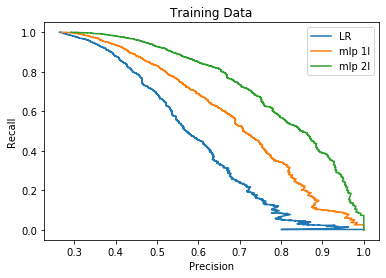

In [89]:
# Get precision and recall for logistic classifier
precision_lr,recall_lr,thrsld_lr=precision_recall_curve(y_train,lr_clf.decision_function(X_train))

# Get precision and recall for 1-layer mlp
precision_mlp_1l,recall_mlp_1l,thrsld_mlp_1l=precision_recall_curve(y_train,(mlp_clf_1l.predict(X_train)) )

# Get precision and recall for 2-layer mlp
precision_mlp_2l,recall_mlp_2l,thrsld_mlp_2l=precision_recall_curve(y_train,(mlp_clf_2l.predict(X_train)) )

# Plot the curves
plt.plot(precision_lr,recall_lr, label='LR')
plt.plot(precision_mlp_1l,recall_mlp_1l,label='mlp 1l')
plt.plot(precision_mlp_2l,recall_mlp_2l,label='mlp 2l')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Training Data')
plt.legend()

As expected, we see that the performance of the neural network *on the training set* improves with the number of layers. However, as we just explained, this is just a mere overfit, since that an opposite trend is found on the validation set.

What we have found suggests that there is not a complex and nonlinear distribution of classes in the feature space. The misclassification errors performed by our logistic classifier are most likely do to the noise. This is the reason because of the neural networks that we have tested not only do not improve the performance of the logistic classifier, but, even worst, tend to overfit the training datas.

For this reason, in next section, when making prediction on the test dataset, we will use the logistic classifier previously trained.

## Prediction on the test dataset

In the present section we perform prediction on the test dataset, which is stored in the `test` variable. As we can see, the test dataset has the same structure of the training dataset:

In [90]:
test

,INDEX,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,...,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
0,3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,...,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
1,9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,...,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
2,10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,...,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
3,18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,...,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
4,21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,...,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2136,10279,NaN,NaN,0,46.0,0,0.0,$0,No,$0,...,"$1,500",6,Sports Car,no,"$20,519",1,Yes,3,8.0,z_Highly Rural/ Rural
2137,10281,NaN,NaN,0,46.0,0,12.0,"$43,501",No,"$134,977",...,"$16,080",3,Minivan,no,$0,0,No,2,1.0,z_Highly Rural/ Rural
2138,10285,NaN,NaN,0,55.0,0,10.0,"$141,083",No,"$393,624",...,"$21,110",10,Sports Car,no,$0,0,No,0,22.0,z_Highly Rural/ Rural
2139,10294,NaN,NaN,0,51.0,0,10.0,"$128,523",No,$0,...,"$32,960",6,Panel Truck,no,"$3,995",3,No,1,15.0,Highly Urban/ Urban


Before to make predictions, we need to prepare the test dataset as we have done on the training dataset. This can be done using the `transform()` method of the previously defined pipeline:

In [91]:
# Prepared test dataset:
test_tr=full_pipeline.transform(test)

In [92]:
test_tr

array([[0.        , 0.49230769, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.36923077, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.43076923, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.        , 0.6       , 0.5       , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.53846154, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.49230769, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Now we can make prediction out of the test set, using the `predict()` method of the logistic classifier previously defined:

In [93]:
test_pred=lr_clf.predict(test_tr)

However, as we as explained before, it may be useful (in order to search for a better trade-off between recall and precision) to fix a non zero threshold for the decision function. As we have already discussed, the threshold which allows to correctly predict the number of accident (including false positives) has been found and stored in the variable `TargetThrsld':

In [94]:
TargetThresld

-0.5419265964117207

It would be interesting to see how this threshold perform on the test dataset, therefore we also make predictions using this threshold:

In [95]:
# Evaluate the decision function on test dataset
test_scores=lr_clf.decision_function(test_tr)

# Classify as positive instances for which the
# decision function is larger than the threshold
test_pred_thrsld=(test_scores>=TargetThresld).astype(int)

In [96]:
test_pred_thrsld.sum()

593

We now store the predictions in the form of a Pandas Series: 

In [97]:
test_pred_S=pd.Series(test_pred)
test_pred_thrsld_S=pd.Series(test_pred_thrsld)

And I finally save them as csv file:

In [98]:
test_pred_S.rename('TARGET_FLAG').to_csv('test_pred.csv',index_label='index')
test_pred_thrsld_S.rename('TARGET_FLAG').to_csv('test_pred_thrsld.csv',index_label='index')

# Conclusions

The goal of this technical excercise was to build a model able to predict whether a given policy holder was more or less likely to have a car accident. A training dataset containing the class of each policy holder (i.e. if he/she was actually involved in a car accident) was given, along many feature describing the driving behaviour and the lifestyle of each driver. On the basis of this dataset, one had to train a machine learning algorithm and perform the classification task on the (unlabelled) test set.

In the first section I explored the structure of the dataset. I gave an explanation of the features contained in it, and I searched for the attributes which have the most important impact on the probability of accident.

In the second section, I prepared the data for the use in a machine learning algorithm. I transformed the attributes encoded as text strings in numerical values, and where necessary I performed an imputation of missing values and cleaned the datas from outliers. All these transformation have been implemented in a pipeline with the objective to automate the process for future applications, and to make the procedure as clear as possible.

In the third section I proposed two different machine learning algorithms to perform this classification task: a linear regression model, and nonlinear neural network (multilayer perceptron). I also discussed several metrics to evaluate the performance of the dataset (accuracy, confusion matrix, precision, and recall), and I proposed a strategy to find the precisionrecall trade-off most convenient for the present business case. As conclusion of this section, I found that the introduction of non-linearity in the model (i.e. the neural network) does not improve significantly the performance of the classifier. This seems to suggest that the errors made by the logistic regression classifier are not due to the presence of a complex nonlinear decision bounduary between the classes, but are most likely due to the presence of noise in the dataset.

Finally, in the fifth section, I applied the pipeline previously defined on the test dataset, and I made predictions out of the test datas. These predictions have been stored in two `*.csv` files, corresponding respectively to the predictions made with and without the adapted threshold.
